IMPORTING IMPORTANT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')



LOADING THE DATA

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Asthma/asthma_disease_data.csv')


In [ ]:
df.drop(columns=['DoctorInCharge','PatientID'], inplace=True)

DATA PREPARATION

Balancing The Data

Majority of this target variable contains more false values and less true values so we have to balance the class



Before oversampling

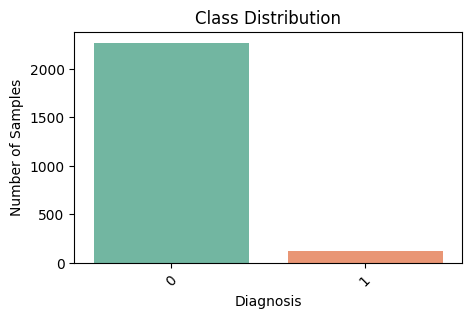

In [ ]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Diagnosis', data=df, palette='Set2')

plt.title('Class Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['Diagnosis'].value_counts()

,count
Diagnosis,
0,2268
1,124


code for oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
df = pd.concat([X_res, y_res], axis=1)

To Plot

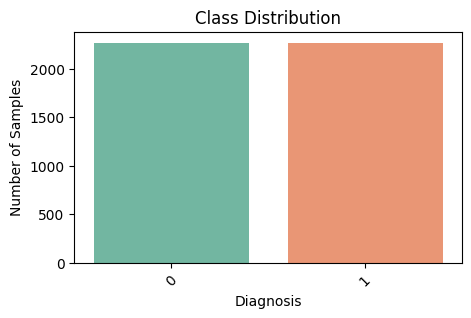

In [ ]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Diagnosis', data=df, palette='Set2')

plt.title('Class Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['Diagnosis'].value_counts()

,count
Diagnosis,
0,2268
1,2268


In [ ]:
#head
df.head()


,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,...,0,1.369051,4.941206,0,0,1,0,0,1,0
1,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,...,0,2.197767,1.702393,1,0,0,1,1,1,0
2,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,...,0,1.698011,5.022553,1,1,1,0,1,1,0
3,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,...,0,3.032037,2.300159,1,0,1,1,1,0,0
4,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,...,0,3.470589,3.067944,1,1,1,0,0,1,0


In [ ]:
#tail
df.tail()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
4531,21,0,1,3,16.339185,1,7.889302,7.941241,9.604299,2.262656,...,1,2.949005,3.276920,0,0,0,1,0,1,1
4532,20,0,0,1,21.056607,0,3.317995,4.155262,9.616201,5.098364,...,0,3.777004,4.830996,0,0,1,1,1,0,1
4533,32,0,0,1,29.595293,0,0.735877,8.814222,4.130113,5.633481,...,0,1.753482,3.877398,0,1,0,0,0,0,1
4534,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,2.483829,...,0,3.125249,5.166032,0,1,0,0,0,1,1
4535,12,1,3,2,29.798041,0,3.593522,7.909654,4.861379,9.725283,...,0,1.725790,5.894244,1,1,1,0,1,1,1


In [ ]:
#shape
df.shape

(4536, 27)

In [ ]:
#info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4536 entries, 0 to 4535
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4536 non-null   int64  
 1   Gender                  4536 non-null   int64  
 2   Ethnicity               4536 non-null   int64  
 3   EducationLevel          4536 non-null   int64  
 4   BMI                     4536 non-null   float64
 5   Smoking                 4536 non-null   int64  
 6   PhysicalActivity        4536 non-null   float64
 7   DietQuality             4536 non-null   float64
 8   SleepQuality            4536 non-null   float64
 9   PollutionExposure       4536 non-null   float64
 10  PollenExposure          4536 non-null   float64
 11  DustExposure            4536 non-null   float64
 12  PetAllergy              4536 non-null   int64  
 13  FamilyHistoryAsthma     4536 non-null   int64  
 14  HistoryOfAllergies      4536 non-null   

In [ ]:
#finding missing value
df.isnull().sum()

,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
PhysicalActivity,0
DietQuality,0
SleepQuality,0
PollutionExposure,0


In [ ]:
#EDA
#descriptive statistics
df.describe()


,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
count,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,...,4536.000000,4536.000000,4536.000000,4536.000000,4536.00000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000
mean,41.619268,0.506393,0.713183,1.318783,27.065878,0.126543,5.065609,5.025011,7.084821,4.999330,...,0.171517,2.589295,3.838333,0.629409,0.48567,0.467152,0.481261,0.578483,0.660714,0.500000
std,22.041414,0.500014,1.029858,0.926760,7.085990,0.332497,2.878647,2.900153,1.729230,2.991421,...,0.377001,0.840163,1.308985,0.483016,0.49985,0.498975,0.499704,0.493856,0.473519,0.500055
min,5.000000,0.000000,0.000000,0.000000,15.031803,0.000000,0.001740,0.003031,4.001437,0.001022,...,0.000000,1.000459,1.500045,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.750000,0.000000,0.000000,1.000000,20.936782,0.000000,2.834914,2.616793,5.613774,2.331309,...,0.000000,1.857126,2.775262,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.000000,1.000000,0.000000,1.000000,27.156679,0.000000,4.912265,5.093392,7.125330,5.099558,...,0.000000,2.625537,3.863918,1.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.500000
75%,61.000000,1.000000,1.000000,2.000000,32.985786,0.000000,7.389321,7.746272,8.512743,7.649812,...,0.000000,3.298693,4.933878,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
max,79.000000,1.000000,3.000000,3.000000,39.985611,1.000000,9.995809,9.999904,9.996235,9.998964,...,1.000000,3.999719,5.999421,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


VISUALISATION

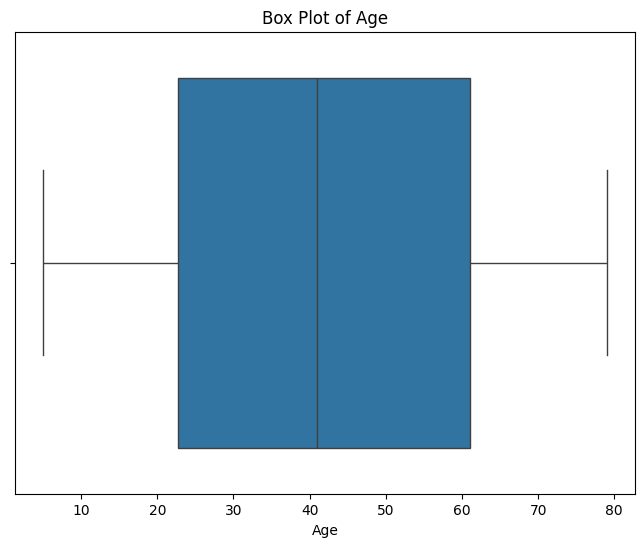

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age')
plt.show()

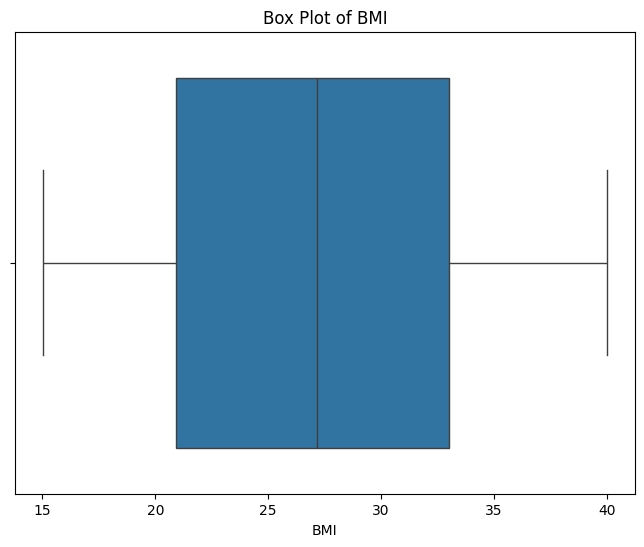

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['BMI'])
plt.title('Box Plot of BMI')
plt.show()

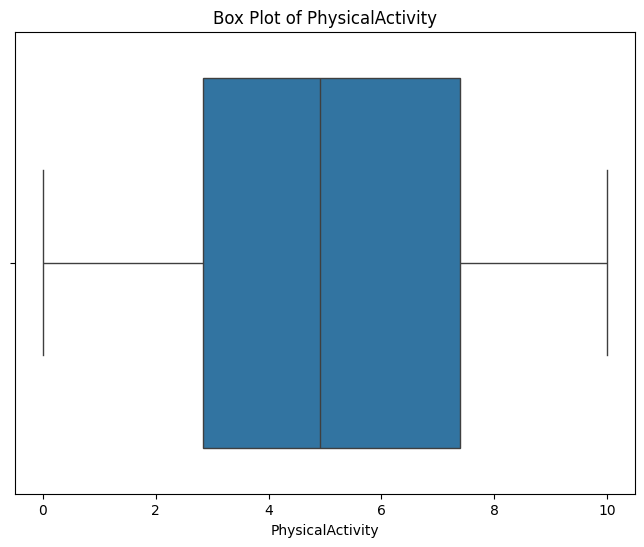

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['PhysicalActivity'])
plt.title('Box Plot of PhysicalActivity')
plt.show()

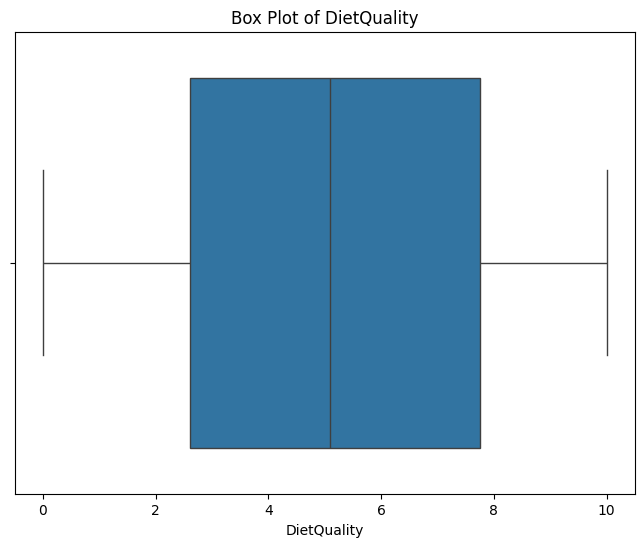

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['DietQuality'])
plt.title('Box Plot of DietQuality')
plt.show()

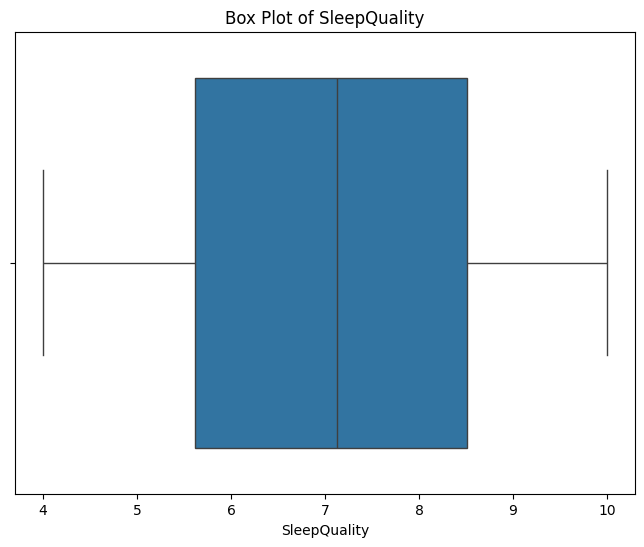

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['SleepQuality'])
plt.title('Box Plot of SleepQuality')
plt.show()

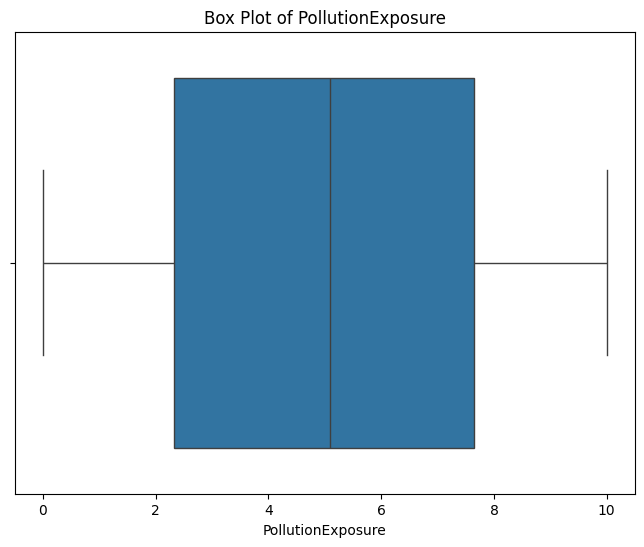

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['PollutionExposure'])
plt.title('Box Plot of PollutionExposure')
plt.show()

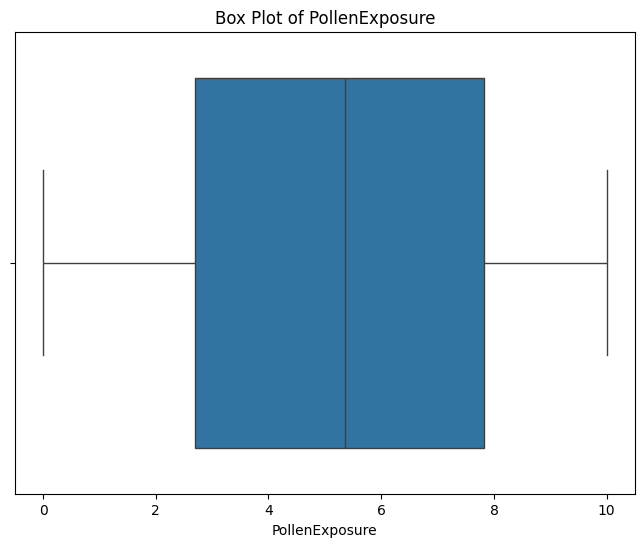

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['PollenExposure'])
plt.title('Box Plot of PollenExposure')
plt.show()

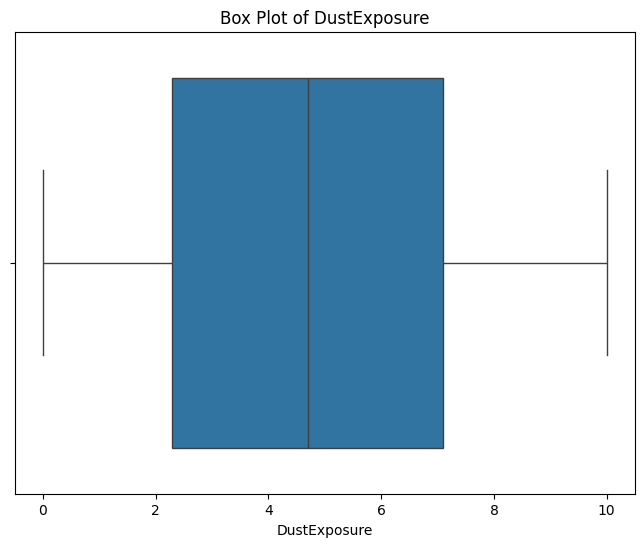

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['DustExposure'])
plt.title('Box Plot of DustExposure')
plt.show()

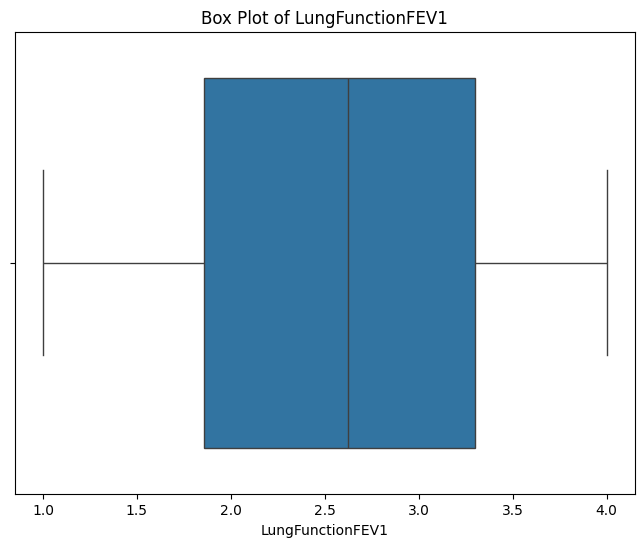

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['LungFunctionFEV1'])
plt.title('Box Plot of LungFunctionFEV1')
plt.show()

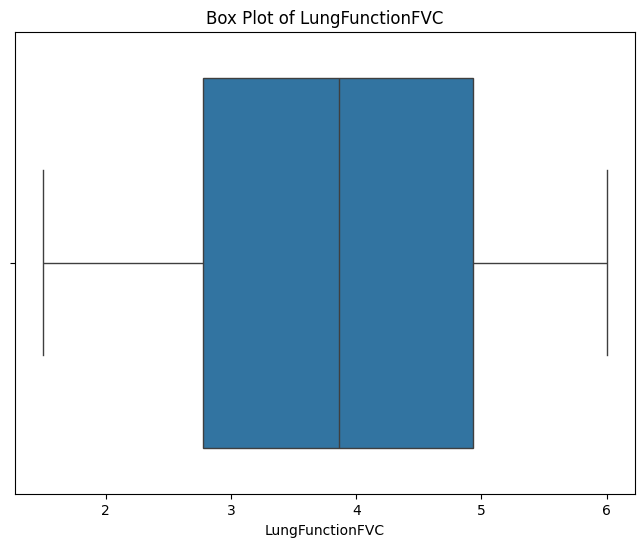

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['LungFunctionFVC'])
plt.title('Box Plot of LungFunctionFVC')
plt.show()

<Axes: xlabel='Diagnosis', ylabel='count'>

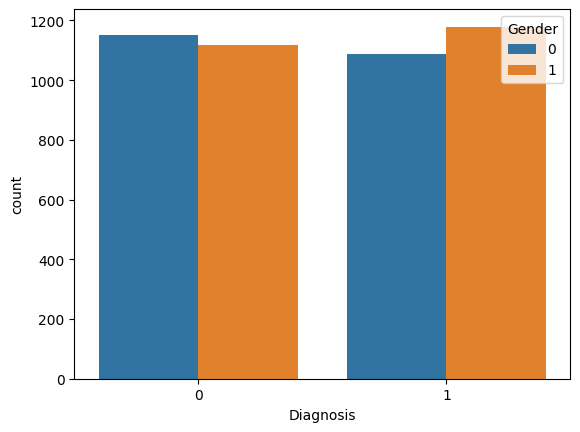

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df,x='Diagnosis', hue='Gender')

<Axes: xlabel='Diagnosis', ylabel='count'>

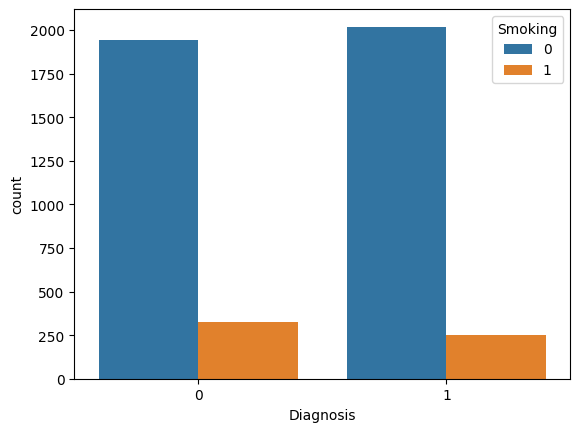

In [ ]:
sns.countplot(data=df,x='Diagnosis', hue='Smoking')

<Axes: xlabel='Diagnosis', ylabel='count'>

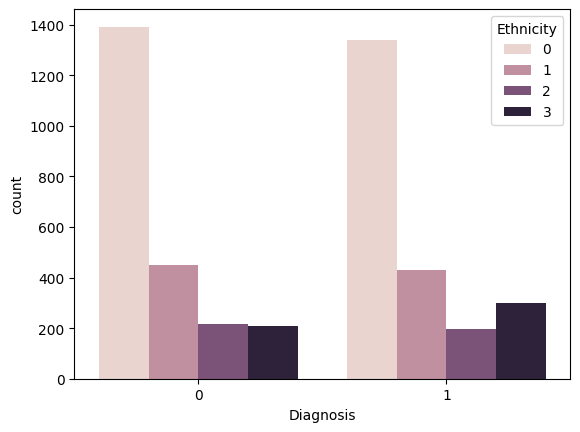

In [ ]:
sns.countplot(data=df,x='Diagnosis', hue='Ethnicity')

<Axes: xlabel='Diagnosis', ylabel='count'>

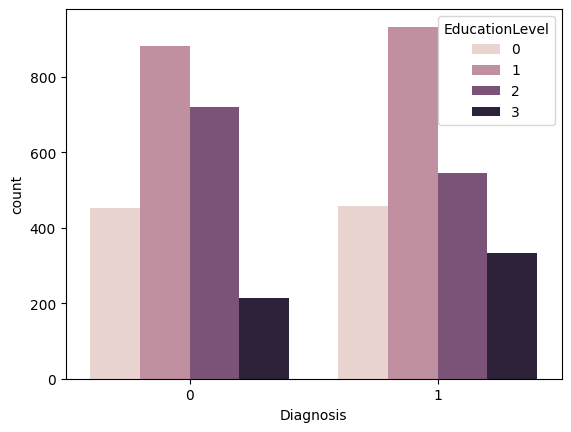

In [ ]:
sns.countplot(data=df,x='Diagnosis', hue='EducationLevel')

<Axes: xlabel='Diagnosis', ylabel='count'>

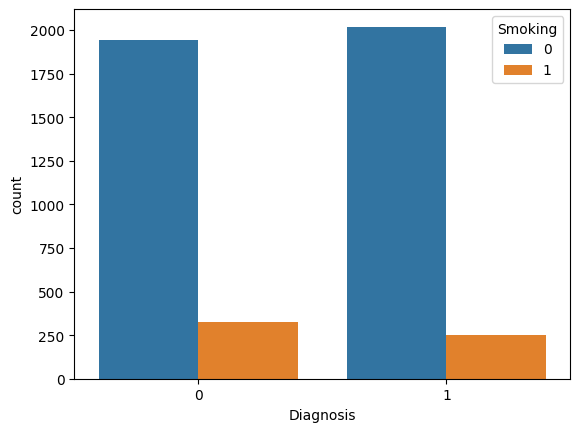

In [ ]:
sns.countplot(data=df,x='Diagnosis', hue='Smoking')

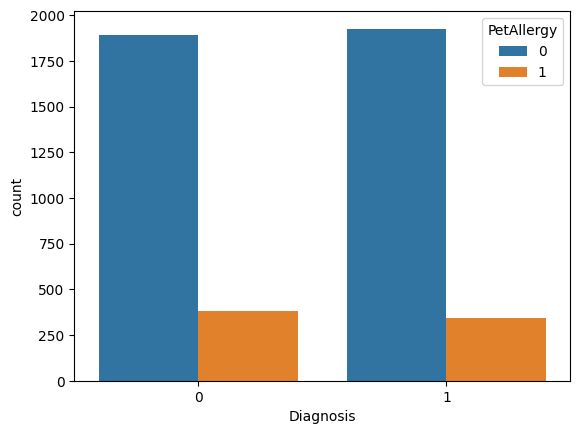

In [ ]:
sns.countplot(data=df,x='Diagnosis', hue='PetAllergy')
plt.show()

<Axes: xlabel='Diagnosis', ylabel='count'>

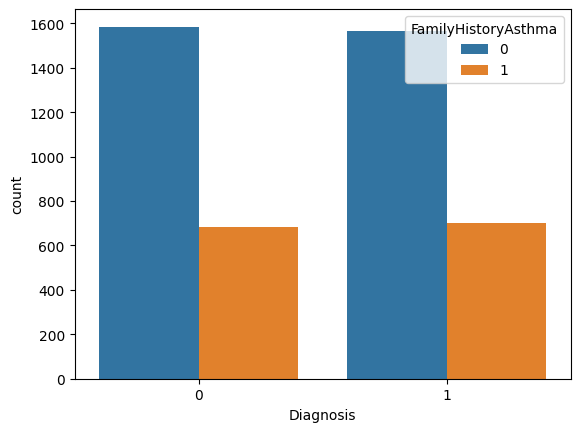

In [ ]:
sns.countplot(data=df,x='Diagnosis', hue='FamilyHistoryAsthma')

<Axes: xlabel='Diagnosis', ylabel='count'>

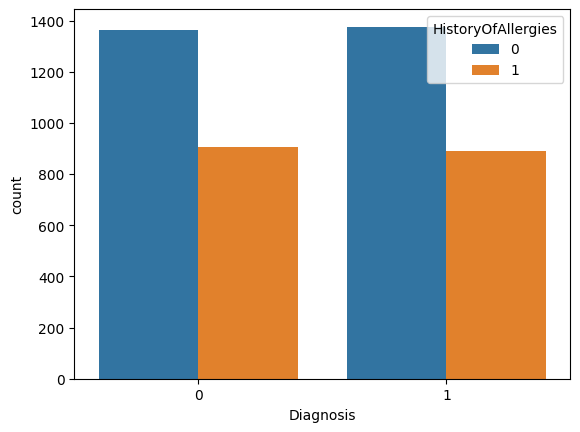

In [ ]:
sns.countplot(data=df,x='Diagnosis', hue='HistoryOfAllergies')

<Axes: xlabel='Diagnosis', ylabel='count'>

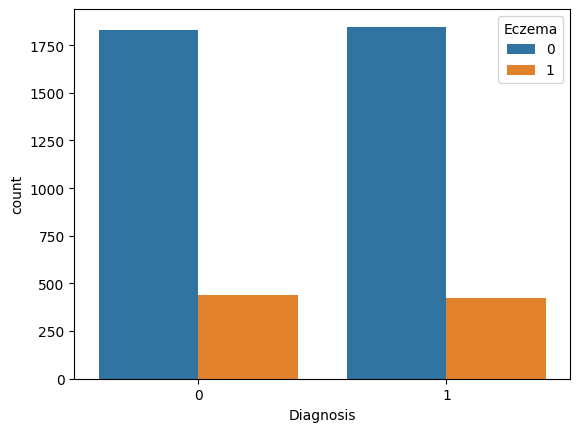

In [ ]:
sns.countplot(data=df,x='Diagnosis', hue='Eczema')

<Axes: xlabel='Diagnosis', ylabel='count'>

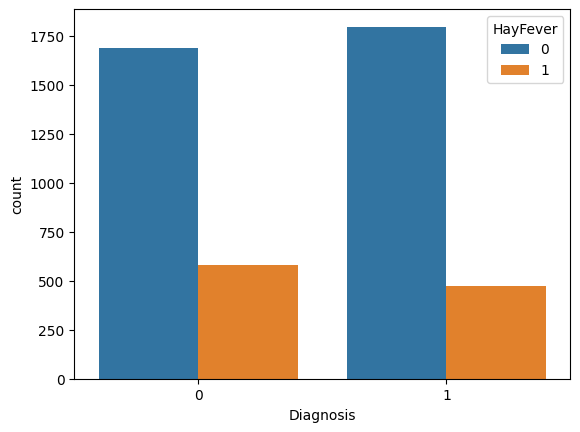

In [ ]:
sns.countplot(data=df,x='Diagnosis', hue='HayFever')

<Axes: xlabel='Diagnosis', ylabel='count'>

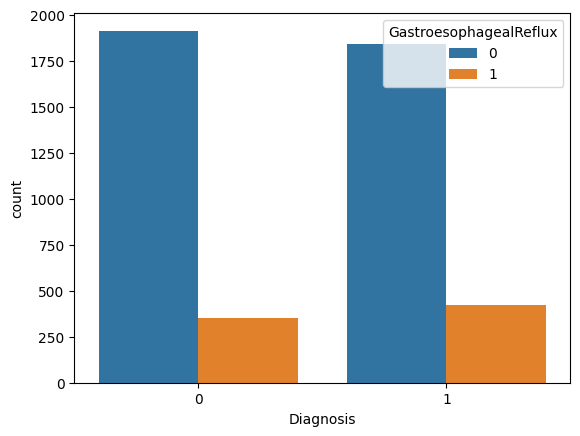

In [ ]:
sns.countplot(data=df,x='Diagnosis', hue='GastroesophagealReflux')

<Axes: xlabel='Diagnosis', ylabel='count'>

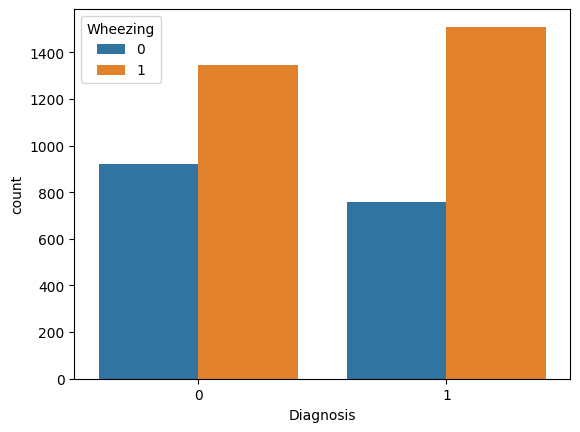

In [ ]:
sns.countplot(data=df,x='Diagnosis', hue='Wheezing')

<Axes: xlabel='Diagnosis', ylabel='count'>

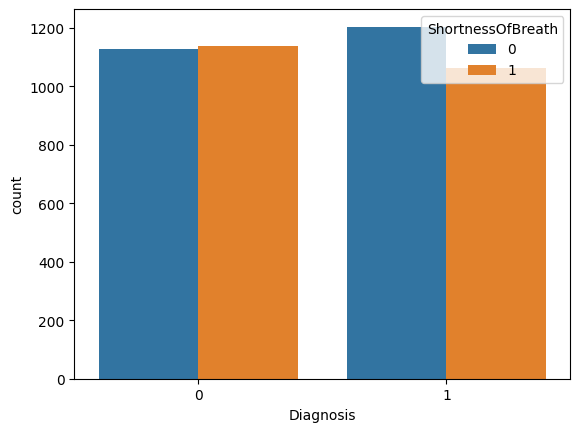

In [ ]:
sns.countplot(data=df,x='Diagnosis', hue='ShortnessOfBreath')

<Axes: xlabel='Diagnosis', ylabel='count'>

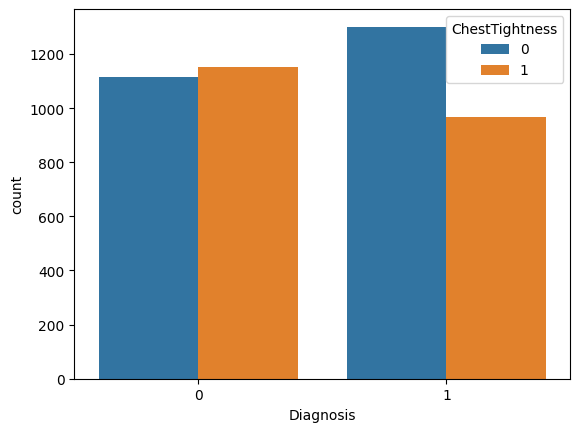

In [ ]:
sns.countplot(data=df,x='Diagnosis', hue='ChestTightness')

<Axes: xlabel='Diagnosis', ylabel='count'>

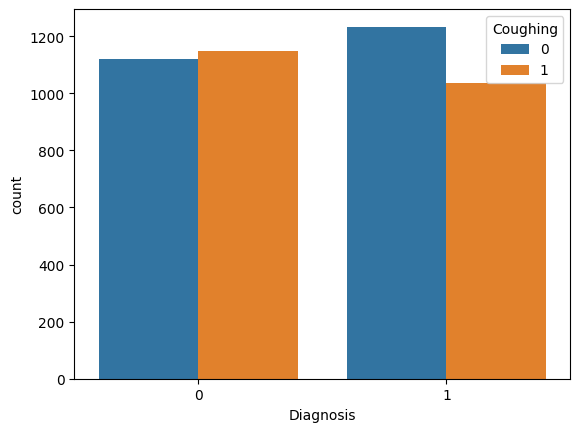

In [ ]:
sns.countplot(data=df,x='Diagnosis', hue='Coughing')

<Axes: xlabel='Diagnosis', ylabel='count'>

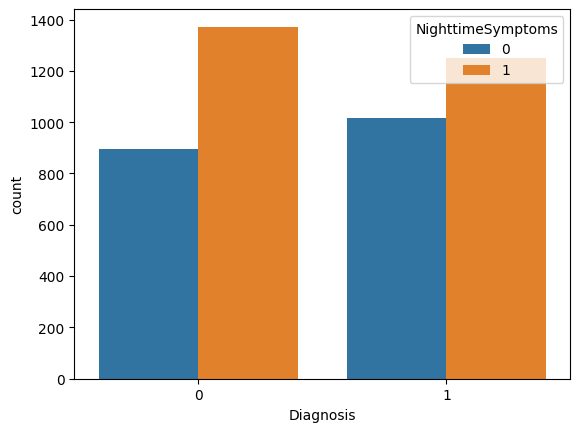

In [ ]:
sns.countplot(data=df,x='Diagnosis', hue='NighttimeSymptoms')

<Axes: xlabel='Diagnosis', ylabel='count'>

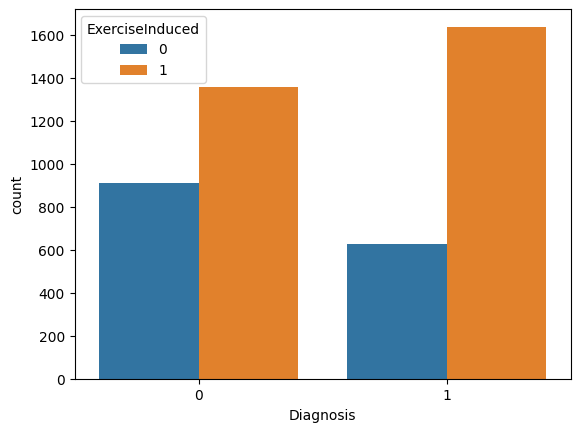

In [ ]:
sns.countplot(data=df,x='Diagnosis', hue='ExerciseInduced')

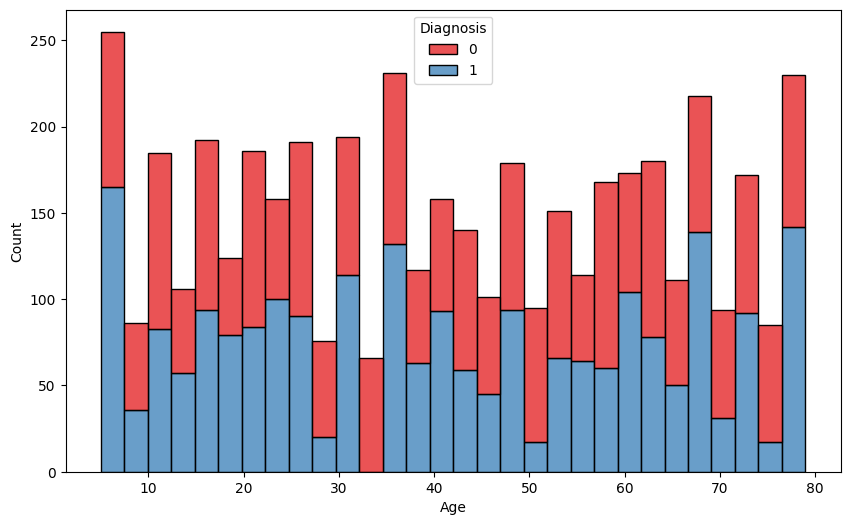

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Diagnosis', multiple='stack', palette='Set1', bins=30)

plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Some age groups like those less than  age 10 from extreme left ,around 70,80) have higher overall counts-diagnosed with asthma, while others (like around age 40 and 60) have lower counts.

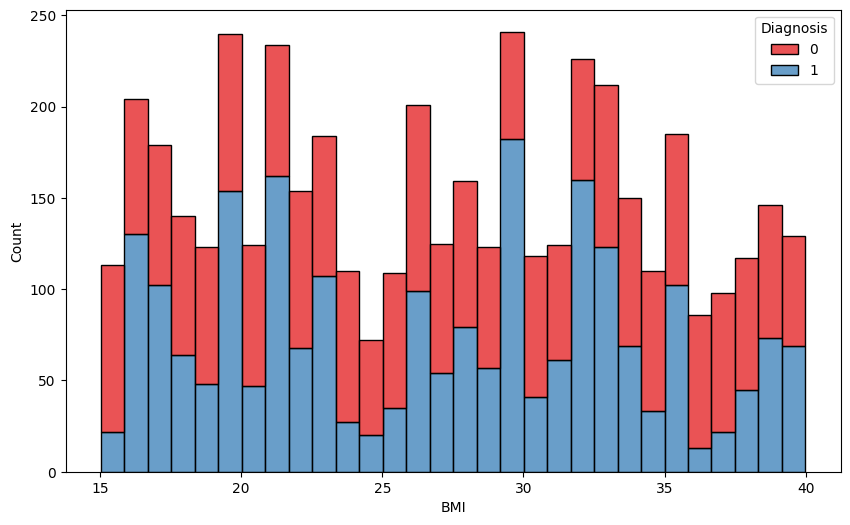

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='BMI', hue='Diagnosis', multiple='stack', palette='Set1', bins=30)

plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()


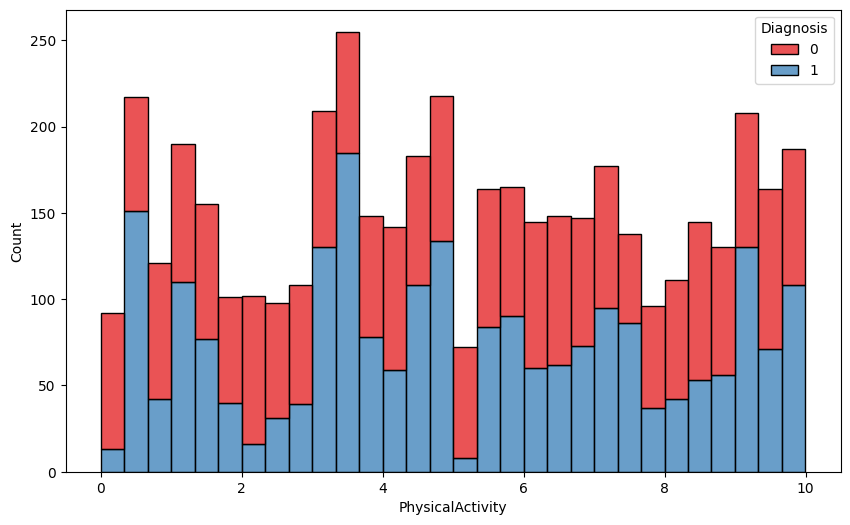

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='PhysicalActivity', hue='Diagnosis', multiple='stack', palette='Set1', bins=30)

plt.xlabel('PhysicalActivity')
plt.ylabel('Count')
plt.show()


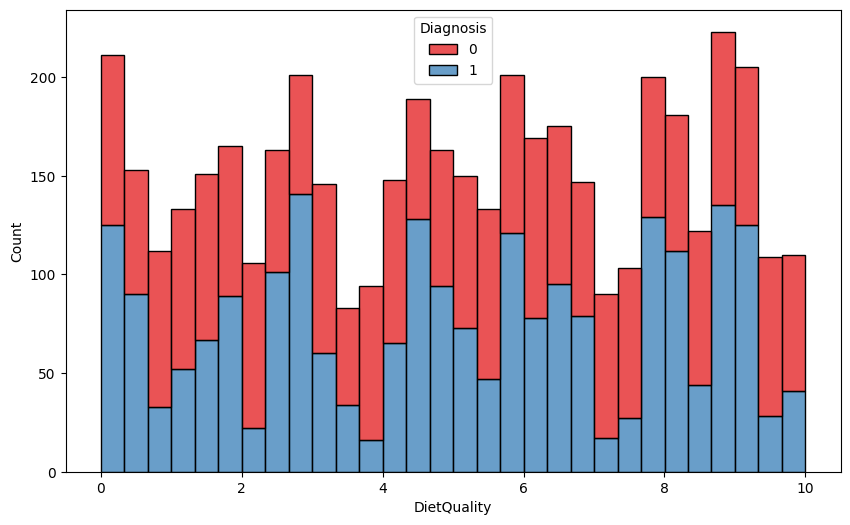

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='DietQuality', hue='Diagnosis', multiple='stack', palette='Set1', bins=30)

plt.xlabel('DietQuality')
plt.ylabel('Count')
plt.show()

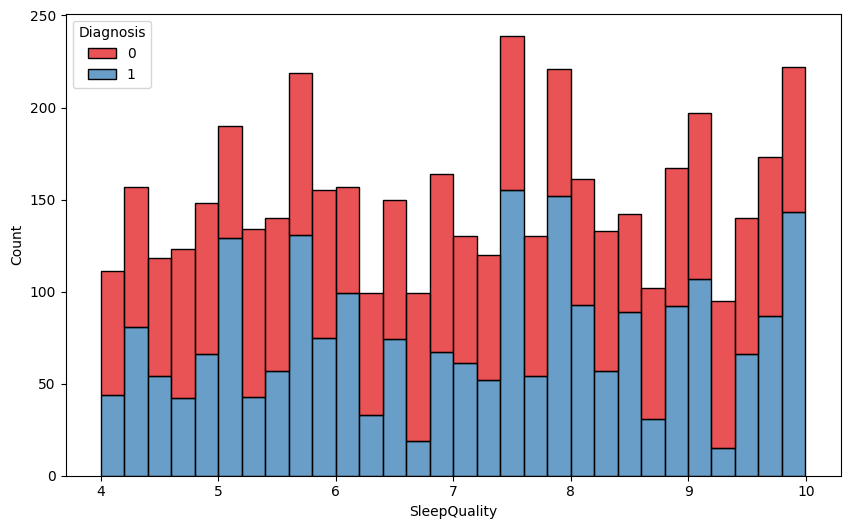

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='SleepQuality', hue='Diagnosis', multiple='stack', palette='Set1', bins=30)

plt.xlabel('SleepQuality')
plt.ylabel('Count')
plt.show()

Around 48 people who sleep for 4 hrs are diagnosed with asthma
150 people,7.5 hrs-asthma diagnosed.

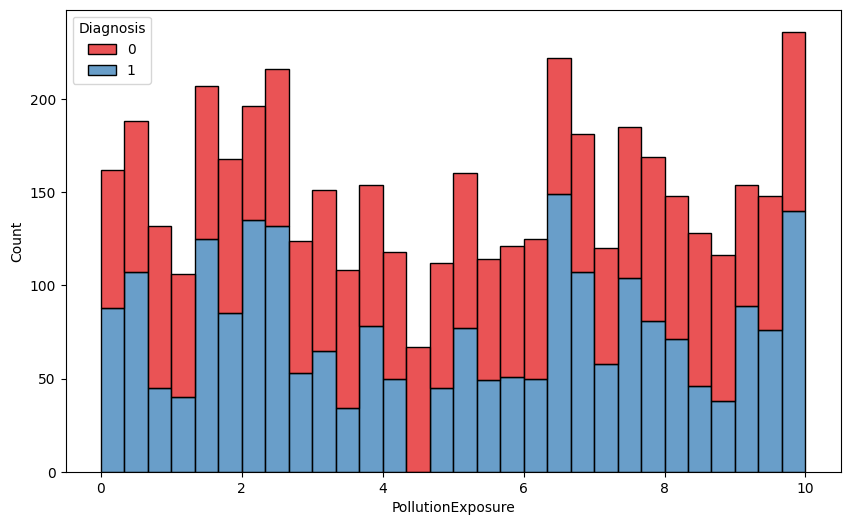

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='PollutionExposure', hue='Diagnosis', multiple='stack', palette='Set1', bins=30)

plt.xlabel('PollutionExposure')
plt.ylabel('Count')
plt.show()

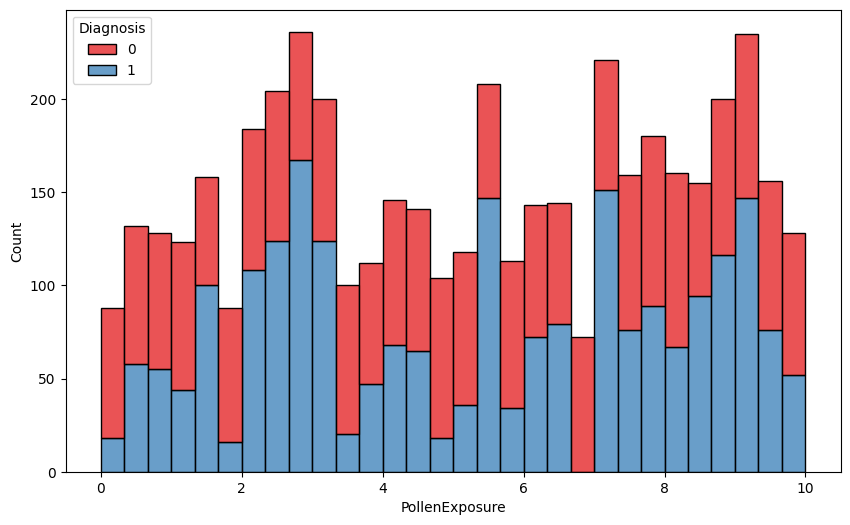

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='PollenExposure', hue='Diagnosis', multiple='stack', palette='Set1', bins=30)

plt.xlabel('PollenExposure')
plt.ylabel('Count')
plt.show()

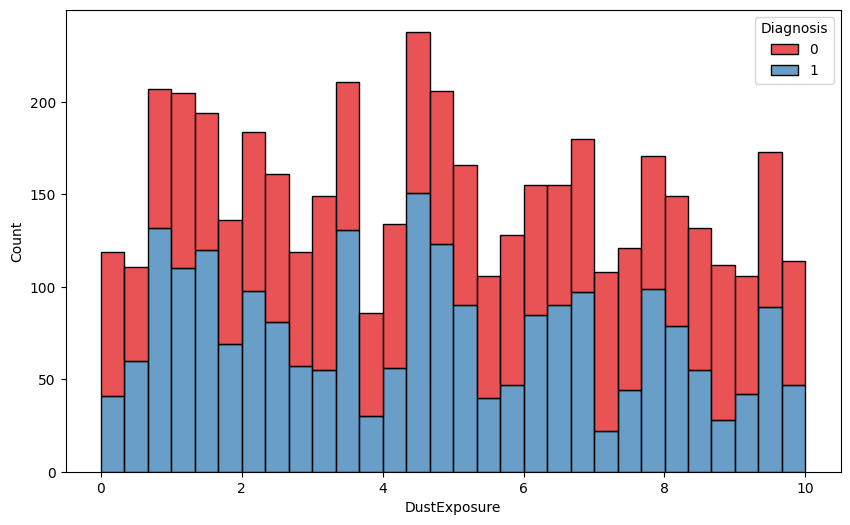

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='DustExposure', hue='Diagnosis', multiple='stack', palette='Set1', bins=30)

plt.xlabel('DustExposure')
plt.ylabel('Count')
plt.show()

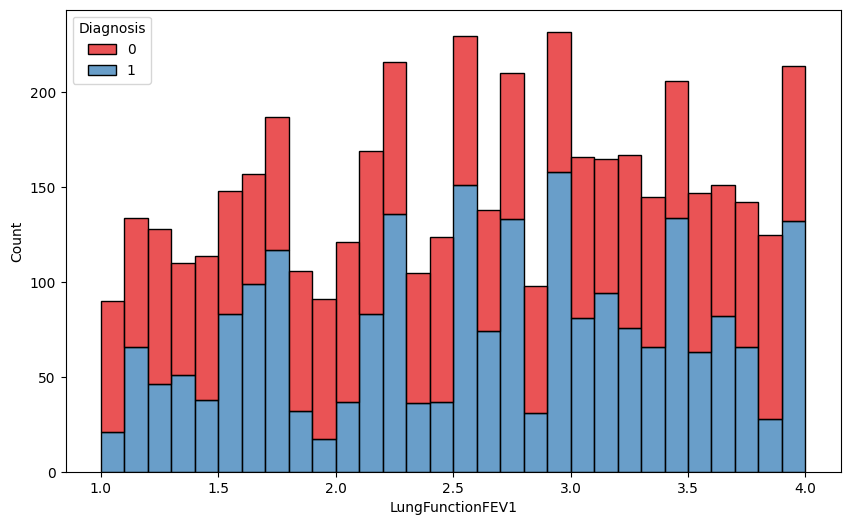

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='LungFunctionFEV1', hue='Diagnosis', multiple='stack', palette='Set1', bins=30)

plt.xlabel('LungFunctionFEV1')
plt.ylabel('Count')
plt.show()

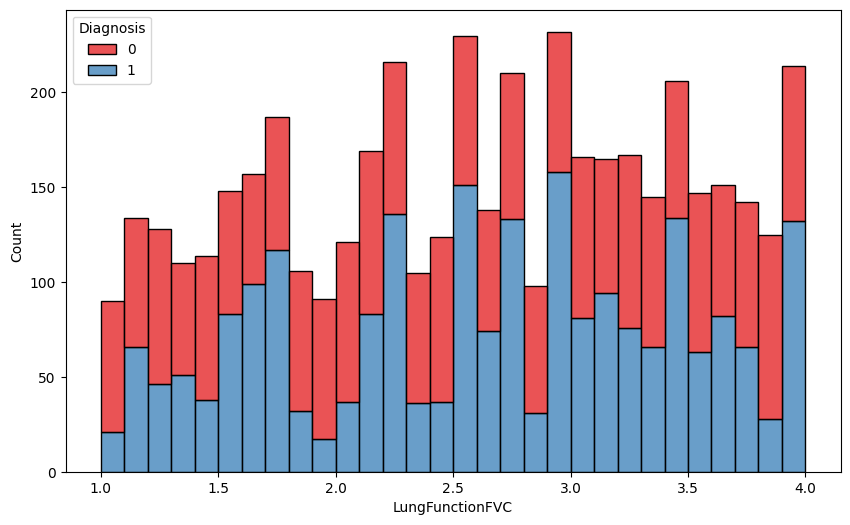

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='LungFunctionFEV1', hue='Diagnosis', multiple='stack', palette='Set1', bins=30)

plt.xlabel('LungFunctionFVC')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='BMI', ylabel='DietQuality'>

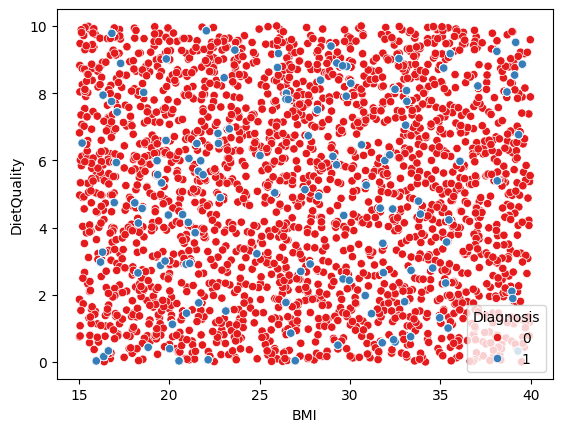

In [ ]:
sns.scatterplot(data=df, x='BMI', y='DietQuality', hue='Diagnosis',palette='Set1')

In [ ]:
new_df=df.copy()

In [ ]:
new_df.to_csv('new_asthma.csv')

# Model Building

* Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
new_df.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'PhysicalActivity', 'DietQuality', 'SleepQuality', 'PollutionExposure',
       'PollenExposure', 'DustExposure', 'PetAllergy', 'FamilyHistoryAsthma',
       'HistoryOfAllergies', 'Eczema', 'HayFever', 'GastroesophagealReflux',
       'LungFunctionFEV1', 'LungFunctionFVC', 'Wheezing', 'ShortnessOfBreath',
       'ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced',
       'Diagnosis'],
      dtype='object')

In [ ]:
X = new_df.drop('Diagnosis', axis=1)
y = new_df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(n_estimators=50,max_depth=7,max_features='sqrt')

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test,y_test))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9688533627342889
0.9493392070484582
0.9493392070484582
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       479
           1       0.90      1.00      0.95       429

    accuracy                           0.95       908
   macro avg       0.95      0.95      0.95       908
weighted avg       0.95      0.95      0.95       908



In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.05066079295154185

In [ ]:
new_df.Diagnosis.value_counts()

,count
Diagnosis,
0,2268
1,2268


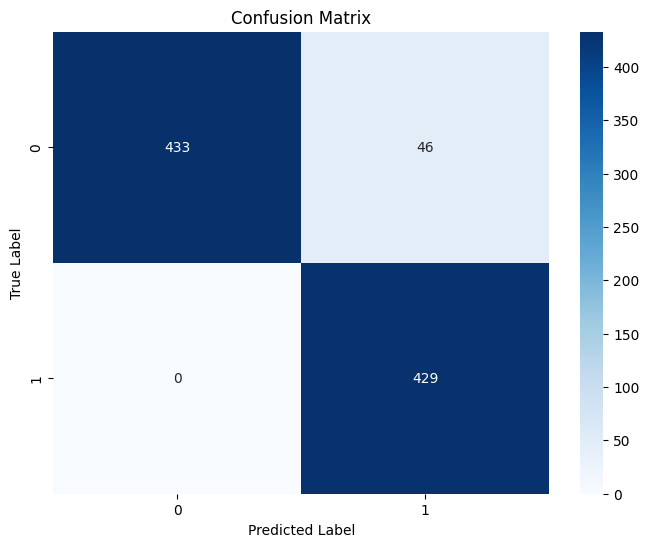

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
new_df.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'PhysicalActivity', 'DietQuality', 'SleepQuality', 'PollutionExposure',
       'PollenExposure', 'DustExposure', 'PetAllergy', 'FamilyHistoryAsthma',
       'HistoryOfAllergies', 'Eczema', 'HayFever', 'GastroesophagealReflux',
       'LungFunctionFEV1', 'LungFunctionFVC', 'Wheezing', 'ShortnessOfBreath',
       'ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced',
       'Diagnosis'],
      dtype='object')

In [ ]:
class_labels = {
    0: "No",
    1: "Yes"
    }

models = {
    "Random Forest": rf_model
}

# Test data: a list of test instances
#user_data_list = [
 #                [[45,1,0,2,27.5,1,5,6,4,9,5,2,1,1,1,0,1,1,3.2,4,1,1,1,1,1,1]]
#]


#Value in the dataset -no asthma
# user_data_list = [
#               [[53,0,2,1,37.92302,0,3.741621,2.571249,7.854012,4.12622,7.916287,0.912935,0,0,0,0,0,0,3.569894,2.75669,0,0,1,0,0,0]]
# ]
#Value in the dataset -asthma
# user_data_list = [
#                [[61,1,1,1,27.281,0,4.990117,2.694982,9.56158,1.933415,5.116137,6.170154,1,0,0,0,1,0,2.250033,2.800118,1,0,1,0,0,1]]
# ]

#unseen data(making adjustments in value in dataset with no asthma)

#user_data_list = [
 #              [[60,0,1,3,35.92302,0,5.741621,5.571249,8.854012,3.12622,6.916287,0.912935,0,0,0,0,0,0,3.569894,2.75669,0,0,1,0,0,0]]
#]

#unseen data(making adjustments in value in dataset with  asthma)
user_data_list = [
             [[61,1,1,1,35.281,0,9.990117,2.694982,9.56158,1.933415,8.116137,7.170154,1,1,1,0,1,0,2.250033,1.800118,1,0,1,0,0,1]]
]









# Iterate through each user data and make predictions
for user_data in user_data_list:
    print(f"Testing on data: {user_data}")
    for model_name, model in models.items():
        user_data1=pd.DataFrame(user_data, columns=['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking','PhysicalActivity', 'DietQuality', 'SleepQuality', 'PollutionExposure','PollenExposure', 'DustExposure', 'PetAllergy', 'FamilyHistoryAsthma','HistoryOfAllergies', 'Eczema', 'HayFever', 'GastroesophagealReflux','LungFunctionFEV1', 'LungFunctionFVC', 'Wheezing', 'ShortnessOfBreath','ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced'])
        prediction = model.predict(user_data1)
        class_label = class_labels[prediction[0]]
        print(f"{model_name} Prediction: {prediction[0]} - {class_label}")
    print("\n")

Testing on data: [[61, 1, 1, 1, 35.281, 0, 9.990117, 2.694982, 9.56158, 1.933415, 8.116137, 7.170154, 1, 1, 1, 0, 1, 0, 2.250033, 1.800118, 1, 0, 1, 0, 0, 1]]
Random Forest Prediction: 1 - Yes


